In [19]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [20]:
df=pd.read_csv("../DataSets/Bank.csv")

In [21]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,retired,married,high.school,unknown,no,yes,telephone,jun,thu,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,0
41184,31,housemaid,married,basic.4y,unknown,no,no,telephone,may,thu,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,0
41185,42,admin.,single,university.degree,unknown,yes,yes,telephone,may,wed,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
41186,48,technician,married,professional.course,no,no,yes,telephone,oct,tue,...,2,999,0,nonexistent,-3.4,92.431,-26.9,0.742,5017.5,0


# Data Preparation

### How to handle missing values in the dataset 

In [24]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

### Convert Data Types if Needed

In [26]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp_var_rate      float64
cons_price_idx    float64
cons_conf_idx     float64
euribor3m         float64
nr_employed       float64
y                   int64
dtype: object

# Exploratory Data Analysis

### What is the distribution of key features

In [29]:
df.describe()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [30]:
df.campaign.unique()

array([ 1,  3,  2,  8,  5,  4, 25, 11, 12, 18,  6, 17,  7, 20, 16, 14, 10,
        9, 19, 29, 13, 40, 15, 34, 22, 24, 41, 21, 23, 39, 28, 27, 31, 35,
       26, 30, 32, 43, 33, 42, 56, 37], dtype=int64)

In [31]:
df.poutcome.value_counts()

poutcome
nonexistent    35563
failure         4252
success         1373
Name: count, dtype: int64

### Which customer profiles job have higher subscription rates

In [33]:
pro=df.groupby('job')['y'].value_counts().unstack()*100
pro

y,0,1
job,,
admin.,907000,135200
blue-collar,861600,63800
entrepreneur,133200,12400
housemaid,95400,10600
management,259600,32800
retired,128600,43400
self-employed,127200,14900
services,364600,32300
student,60000,27500


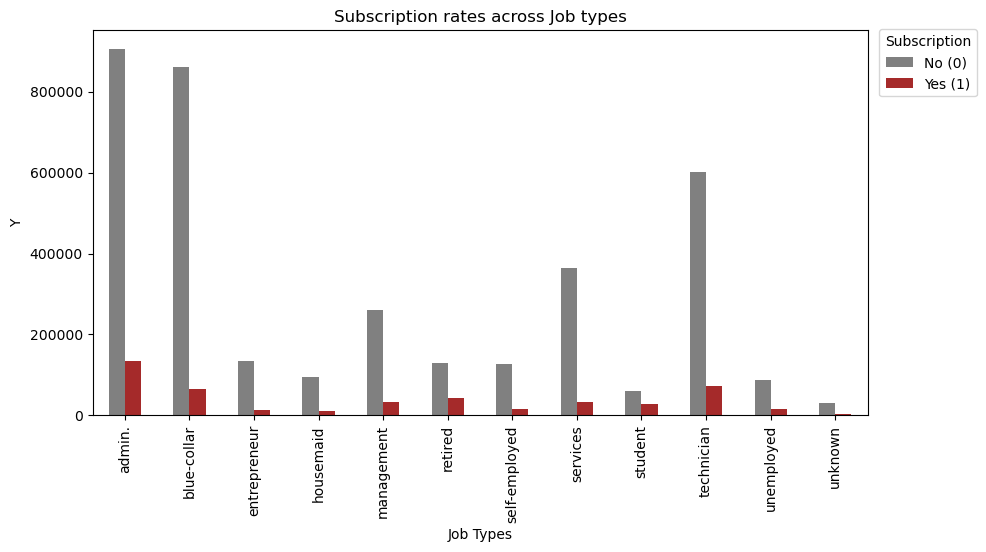

In [34]:
pro.plot(kind='bar',figsize=(10,5),color=['grey','brown'])
plt.legend(['No (0)','Yes (1)'],title='Subscription',bbox_to_anchor=(1.15,1.02))
plt.xlabel('Job Types')
plt.ylabel('Y')
plt.title('Subscription rates across Job types')
plt.show()

 ### Admin and Technician has higher subscription rate amongs all

### Which customer profiles education have higher subscription rates

In [47]:
proportions = df.groupby('education')['y'].value_counts().unstack()*100
proportions

y,0,1
education,,
basic.4y,374800,42800
basic.6y,210400,18800
basic.9y,557200,47300
high.school,848400,103100
illiterate,1400,400
professional.course,464800,59500
university.degree,1049800,167000
unknown,148000,25100


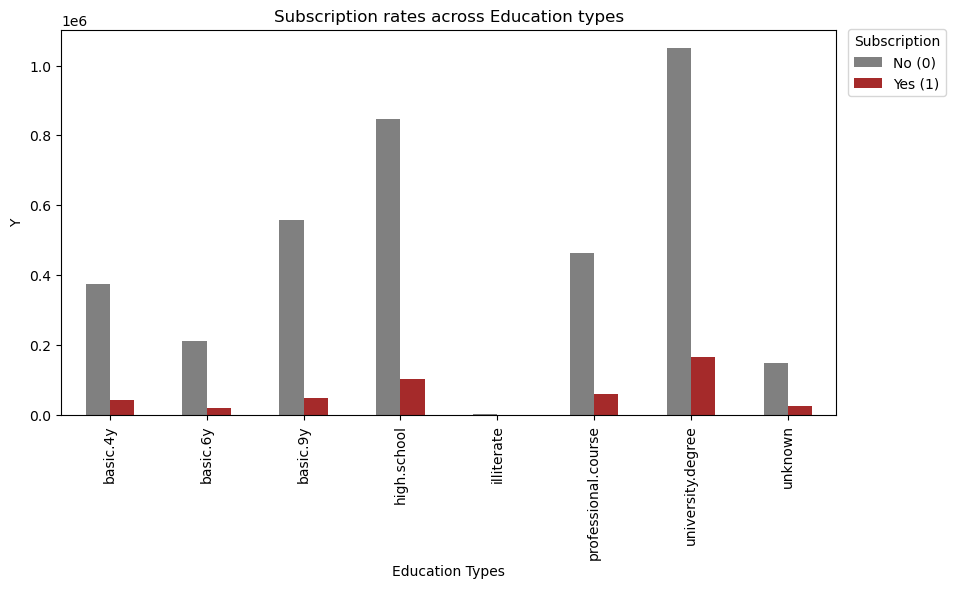

In [49]:
proportions.plot(kind='bar',figsize=(10,5),color=['grey','brown'])
plt.legend(['No (0)','Yes (1)'],title='Subscription',bbox_to_anchor=(1.15,1.02))
plt.xlabel('Education Types')
plt.ylabel('Y')
plt.title('Subscription rates across Education types')
plt.show()                 

### University Degree customers had higher subcription rate

### What are the relationships between input features and the target variable

In [53]:
co=df[['age','campaign','previous','y']].corr()
co

,age,campaign,previous,y
age,1.000000,0.004594,0.024365,0.030399
campaign,0.004594,1.000000,-0.079141,-0.066357
previous,0.024365,-0.079141,1.000000,0.230181
y,0.030399,-0.066357,0.230181,1.000000


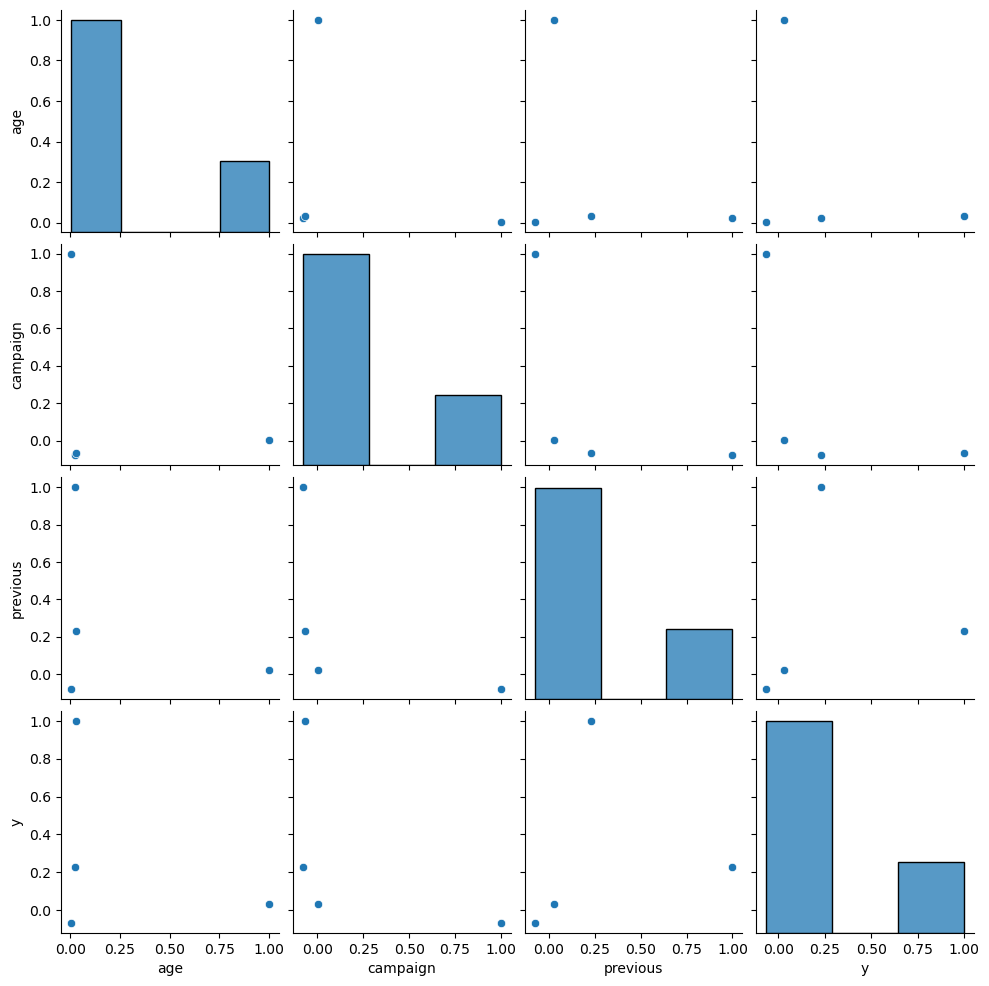

<Figure size 1000x500 with 0 Axes>

In [55]:
sb.pairplot(co)
plt.figure(figsize=(10, 5))
plt.show()

# Client Profile Analysis

### How do job affect subscription decisions

In [58]:
cld=df.groupby('job')['y'].value_counts().unstack()
cld

y,0,1
job,,
admin.,9070,1352
blue-collar,8616,638
entrepreneur,1332,124
housemaid,954,106
management,2596,328
retired,1286,434
self-employed,1272,149
services,3646,323
student,600,275


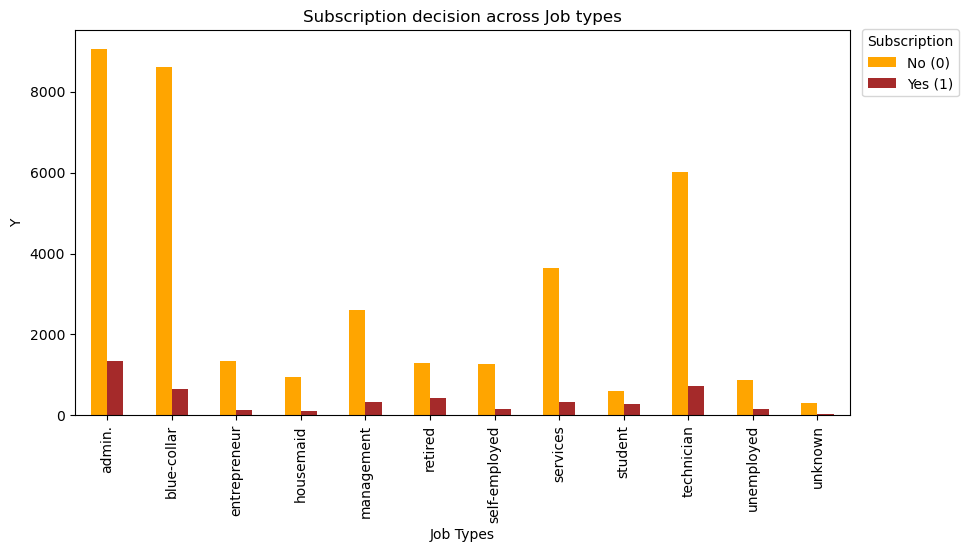

In [59]:
cld.plot(kind='bar',figsize=(10,5),color=['orange','brown'])
plt.legend(['No (0)','Yes (1)'],title='Subscription',bbox_to_anchor=(1.15,1.02))
plt.xlabel('Job Types')
plt.ylabel('Y')
plt.title('Subscription decision across Job types')
plt.show()

### Job affect the subscription as Admin has high subscription 

### How do marital status affect subscription decisions

In [62]:
cld1=df.groupby('marital')['y'].value_counts().unstack()
cld1

y,0,1
marital,,
divorced,4136,476
married,22396,2532
single,9948,1620
unknown,68,12


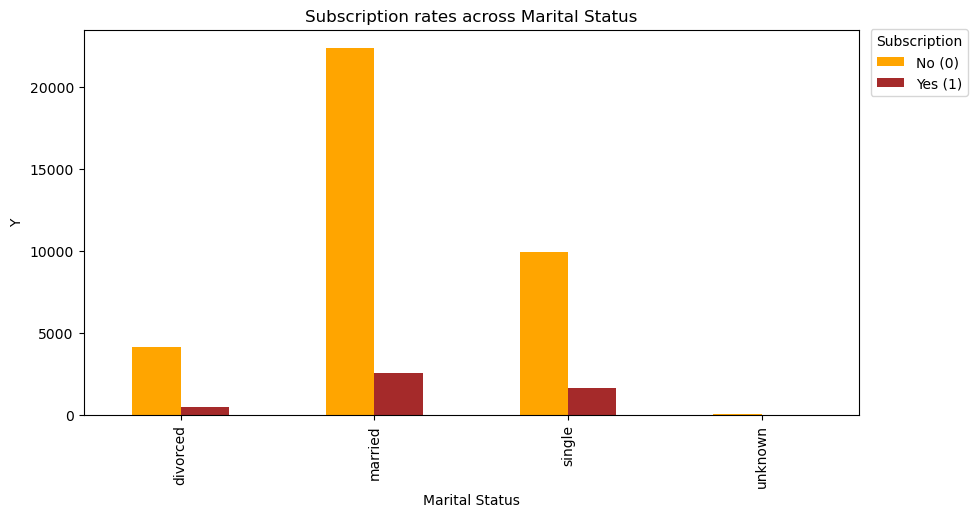

In [63]:
cld1.plot(kind='bar',figsize=(10,5),color=['orange','brown'])
plt.legend(['No (0)','Yes (1)'],title='Subscription',bbox_to_anchor=(1.15,1.02))
plt.xlabel('Marital Status')
plt.ylabel('Y')
plt.title('Subscription rates across Marital Status')
plt.show()

### Divorced customers has low subscription among all 
### Married and Single has most subscription customers

### How do education affect subscription decisions

In [71]:
cld2=df.groupby('education')['y'].value_counts().unstack()
cld2

y,0,1
education,,
basic.4y,3748,428
basic.6y,2104,188
basic.9y,5572,473
high.school,8484,1031
illiterate,14,4
professional.course,4648,595
university.degree,10498,1670
unknown,1480,251


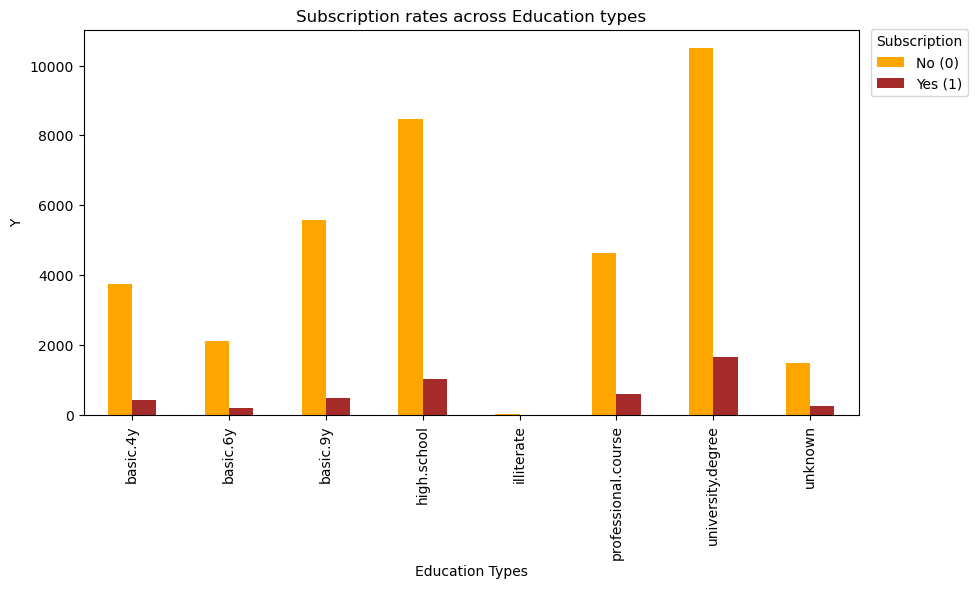

In [73]:
cld2.plot(kind='bar',figsize=(10,5),color=['orange','brown'])
plt.legend(['No (0)','Yes (1)'],title='Subscription',bbox_to_anchor=(1.15,1.02))
plt.xlabel('Education Types')
plt.ylabel('Y')
plt.title('Subscription rates across Education types')
plt.show()

### Education affect the subscription decision as higher the education qualification higher the subcription 

# Campaign Effectiveness

### Does the duration of the call increase the chances of a successful subscription

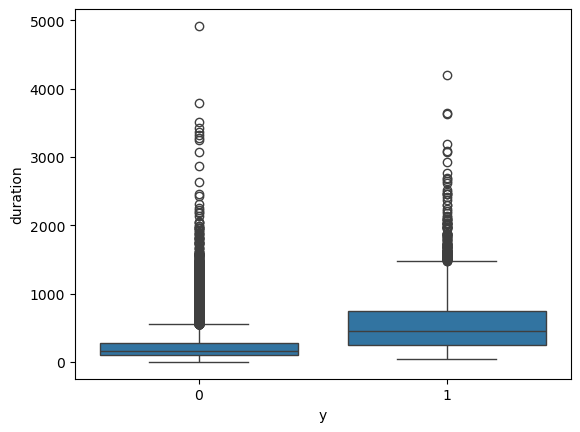

<Figure size 1000x500 with 0 Axes>

In [86]:
sb.boxplot(x=df.y,y=df.duration)
plt.figure(figsize=(10, 5))
plt.show()

### By calling the customers telling them what is the subscription is about goes to higher subscription decisions

In [89]:
 df.groupby('y')['duration'].mean()

y
0    220.844807
1    553.191164
Name: duration, dtype: float64

### Which contact method is most effective

In [92]:
cm=df.groupby('contact')['y'].value_counts(normalize=True).unstack()
cm

y,0,1
contact,,
cellular,0.852624,0.147376
telephone,0.947687,0.052313


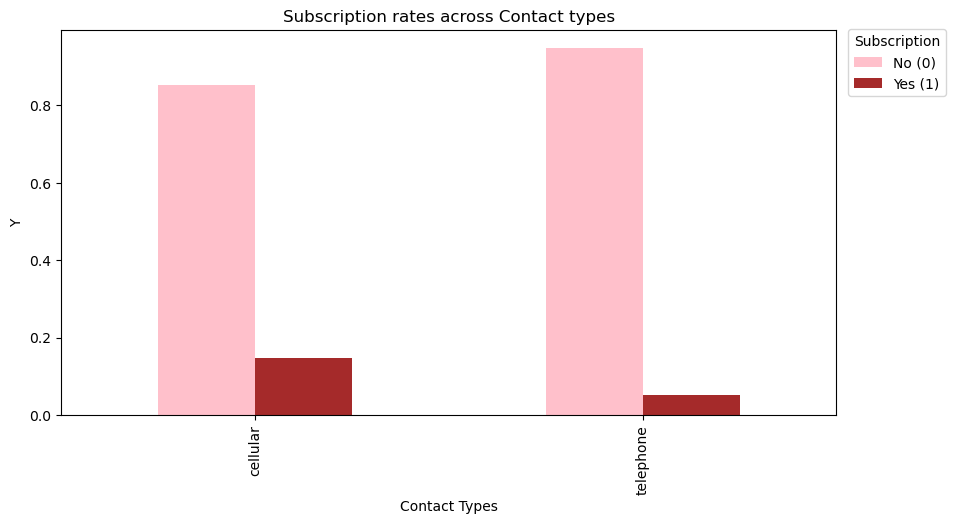

In [94]:
cm.plot(kind='bar',figsize=(10,5),color=['pink','brown'])
plt.legend(['No (0)','Yes (1)'],title='Subscription',bbox_to_anchor=(1.15,1.02))
plt.xlabel('Contact Types')
plt.ylabel('Y')
plt.title('Subscription rates across Contact types')
plt.show()

### Contracting them on their cellular contract makes them more convinent to talk and help them to understand and more easy for subscription decisions

### How many contacts are usually needed before a client subscribes

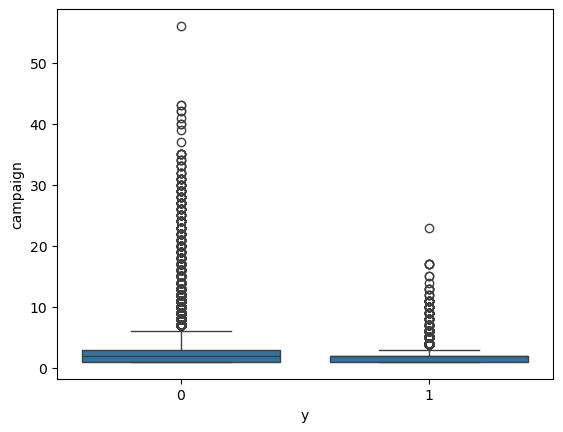

<Figure size 1000x500 with 0 Axes>

In [240]:
sb.boxplot(x=df.y,y=df.campaign)
plt.figure(figsize=(10, 5))
plt.show()

### 

In [73]:
 df.groupby('y')['duration'].mean()

y
0    220.844807
1    553.191164
Name: duration, dtype: float64

# Previous Campaign Impact

### How does the outcome of previous campaigns influence the current one

In [98]:
po=df.groupby('poutcome')['y'].value_counts(normalize=True).unstack()
po

y,0,1
poutcome,,
failure,0.857714,0.142286
nonexistent,0.911678,0.088322
success,0.348871,0.651129


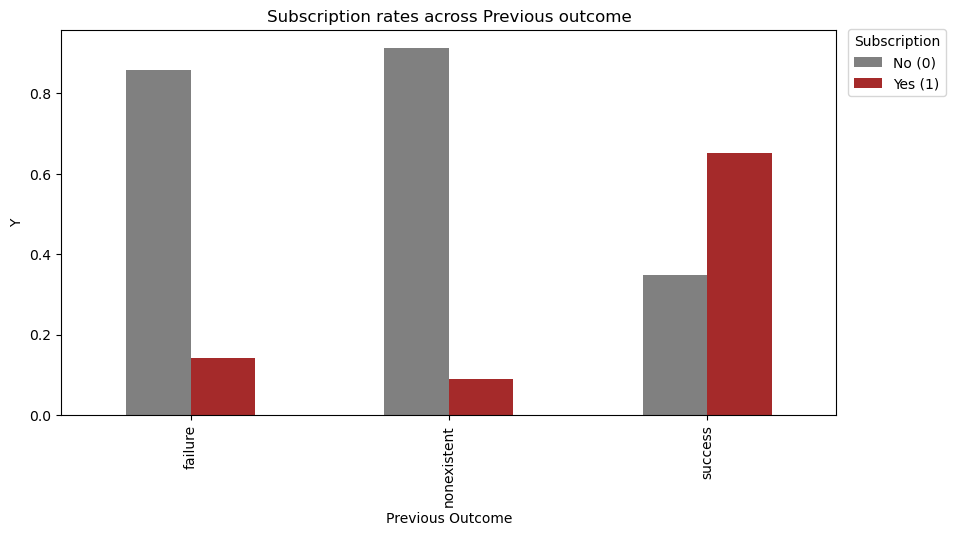

In [105]:
po.plot(kind='bar',figsize=(10,5),color=['grey','brown'])
plt.legend(['No (0)','Yes (1)'],title='Subscription',bbox_to_anchor=(1.15,1.02))
plt.xlabel('Previous Outcome')
plt.ylabel('Y')
plt.title('Subscription rates across Previous outcome')
plt.show()

### Previous Campaign is more sucessfull as of now

### Does having prior contact with a client increase the chance of success

In [81]:
p=df.groupby('previous')['y'].value_counts(normalize=True).unstack()
p

y,0,1
previous,,
0,0.911678,0.088322
1,0.787985,0.212015
2,0.535809,0.464191
3,0.407407,0.592593
4,0.457143,0.542857
5,0.277778,0.722222
6,0.400000,0.600000
7,1.000000,NaN


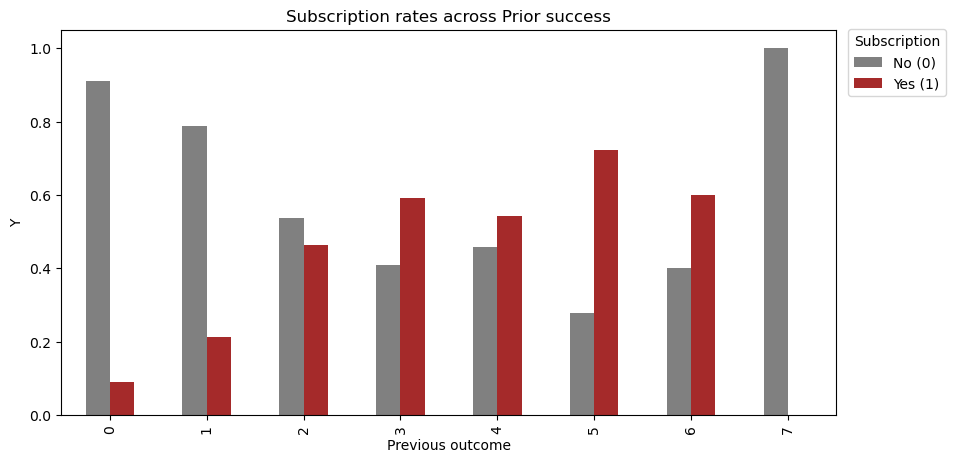

In [236]:
p.plot(kind='bar',figsize=(10,5),color=['grey','brown'])
plt.legend(['No (0)','Yes (1)'],title='Subscription',bbox_to_anchor=(1.15,1.02))
plt.xlabel('Previous outcome')
plt.ylabel('Y')
plt.title('Subscription rates across Prior success')
plt.show()

### Upto 5 prior contract can increases the chance of sucess

# Temporal Analysis

### Which months have higher subscription rates

In [113]:
mo=df.groupby('month')['y'].value_counts(normalize=True).unstack()*100
mo

y,0,1
month,,
apr,79.521277,20.478723
aug,89.397863,10.602137
dec,51.098901,48.901099
jul,90.953443,9.046557
jun,89.488530,10.511470
mar,49.450549,50.549451
may,93.565255,6.434745
nov,89.856133,10.143867
oct,56.128134,43.871866


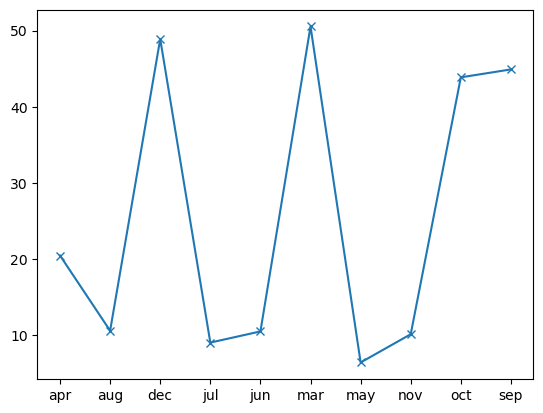

<Figure size 1000x500 with 0 Axes>

In [115]:
plt.plot(mo.index,mo[1],marker='x')
plt.figure(figsize=(10, 5))
plt.show()

### March, December and October months has higher subscription rates

### Is there any effect of the day of the week on subscription success

In [119]:
dow=df.groupby('day_of_week')['y'].value_counts(normalize=True).unstack()
dow

y,0,1
day_of_week,,
fri,0.891913,0.108087
mon,0.900517,0.099483
thu,0.878812,0.121188
tue,0.882200,0.117800
wed,0.883329,0.116671


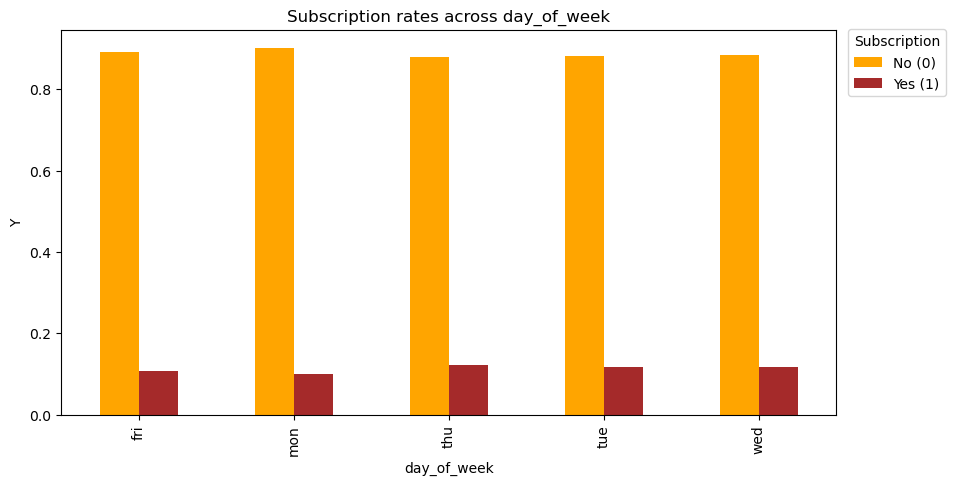

In [121]:
dow.plot(kind='bar',figsize=(10,5),color=['orange','brown'])
plt.legend(['No (0)','Yes (1)'],title='Subscription',bbox_to_anchor=(1.15,1.02))
plt.xlabel('day_of_week')
plt.ylabel('Y')
plt.title('Subscription rates across day_of_week')
plt.show()

### Day of week does not effect the successful subscription 